In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [79]:
# Read the city and ride datafiles and store them to a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Inspecting the city data: Get the columns and the rows that are not null:
city_data_df.count()

# OR
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Get city data column type
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from each city type.
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))

66
36
18


In [8]:
# Inspecting the ride data: Get the columns and the rows that are not null:
ride_data_df.count()

#OR
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
# Get ride data column type
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [82]:
# Merge the ride and city data
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

In [70]:
# Create the city type DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [71]:
# Get the number of rides for each city type.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [72]:
# Get the average fare for each city type.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [73]:
# Get the average number of drivers for each city type.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

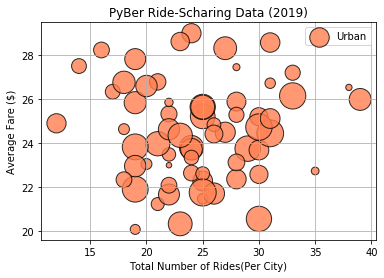

In [74]:
# Build the scatter plos for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            label="Urban",
            color="coral",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)")
# Label the axes
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
# Add gridlines
plt.grid()
# Add a legend
plt.legend()

plt.show()

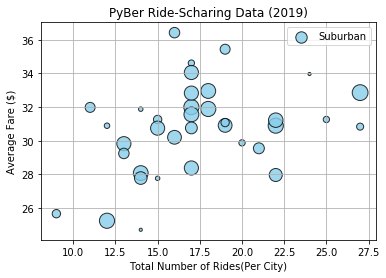

In [75]:
# Build the scatter plos for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            label="Suburban",
            color="skyblue",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)")
# Label the axes
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
# Add gridlines
plt.grid()
# Add a legend
plt.legend()

plt.show()

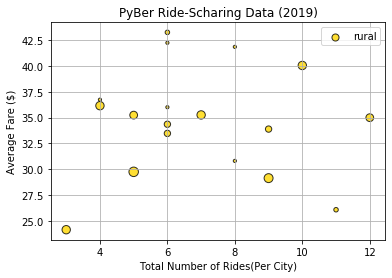

In [76]:
# Build the scatter plos for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            label="rural",
            color="gold",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)")
# Label the axes
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
# Add gridlines
plt.grid()
# Add a legend
plt.legend()

plt.show()

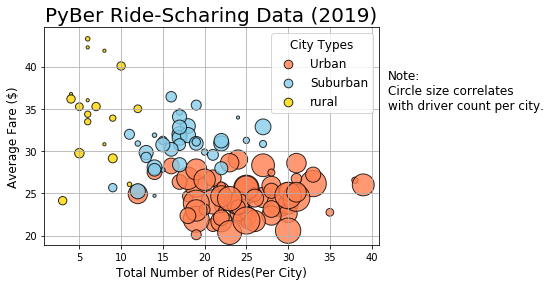

In [107]:
# Create a scatter chart for all 3 city types
# Build the scatter plos for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            label="Urban",
            color="coral",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            label="Suburban",
            color="skyblue",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            label="rural",
            color="gold",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)", fontsize=20)
# Label the axes
plt.xlabel("Total Number of Rides(Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
# Add gridlines
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Add a note about circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png", bbox_inches="tight")

No handles with labels found to put in legend.


Help on Legend in module matplotlib.legend object:

class Legend(matplotlib.artist.Artist)
 |  Legend(parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, borderaxespad=None, columnspacing=None, ncol=1, mode=None, fancybox=None, shadow=None, title=None, title_fontsize=None, framealpha=None, edgecolor=None, facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, handler_map=None)
 |  
 |  Place a legend on the axes at location loc.
 |  
 |  Method resolution order:
 |      Legend
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, borderpad=None, labelspacing=None, han

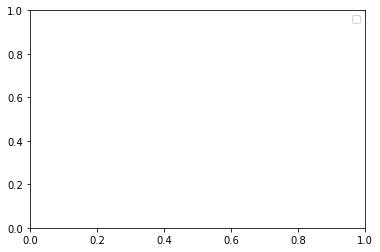

In [89]:
help(plt.legend())